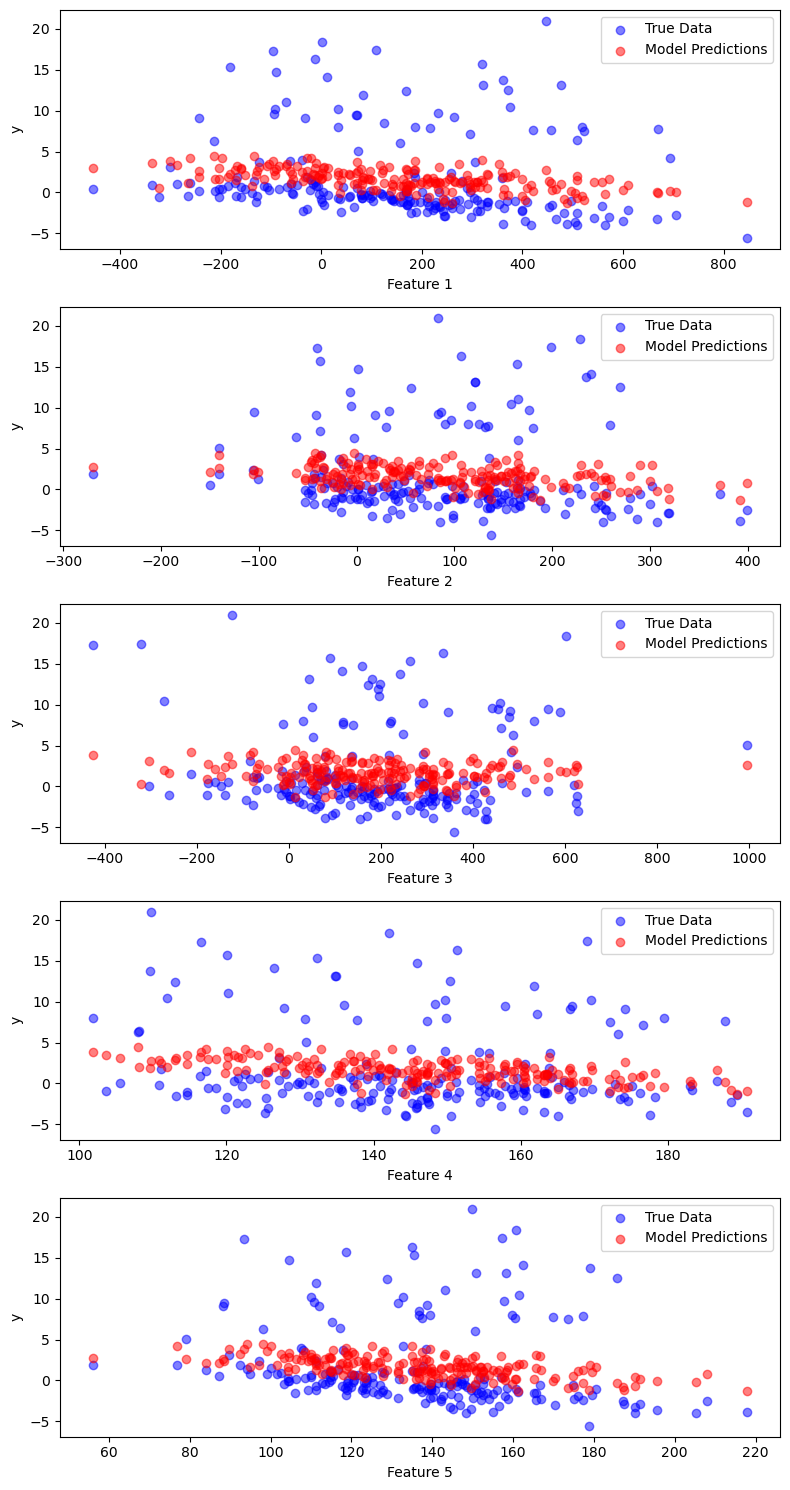

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import random
from scipy import stats



X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')

#Add instrument noise to the training data, lower standard deviation:
instrument_noise = np.random.normal(0, 0.1, size=y_train.shape)
y_train_with_instrument_noise = y_train + instrument_noise

#Add human error to training data with a higher standard deviation that affects 25% of the samples at random:
num_human_error_samples = int(0.25 * len(y_train))
human_error_indices = random.sample(range(len(y_train)), num_human_error_samples)

human_error_noise = np.random.normal(0, 1.0, size=num_human_error_samples)
y_train_with_human_error = y_train_with_instrument_noise.copy()

y_train_with_human_error[human_error_indices] += human_error_noise


model = LinearRegression()
model.fit(X_train, y_train_with_human_error)

#Predict the data 
y_test_pred = model.predict(X_test)

#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)
#print("Model Coefficients (Slope for each feature):", model.coef_)
#print("Model Intercept:", model.intercept_)

num_features = X_train.shape[1]

# Create subplots: one for each feature
fig, axes = plt.subplots(num_features, 1, figsize=(8, 15))

# Loop over each feature and create scatter plots
for i in range(num_features):
    axes[i].scatter(X_train[:, i], y_train_with_human_error, color='blue', label='True Data', alpha=0.5)
    axes[i].scatter(X_train[:, i], y_test_pred, color='red', label='Model Predictions', alpha=0.5)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('y')
    axes[i].legend()

plt.tight_layout()
plt.show()


## Outliers 

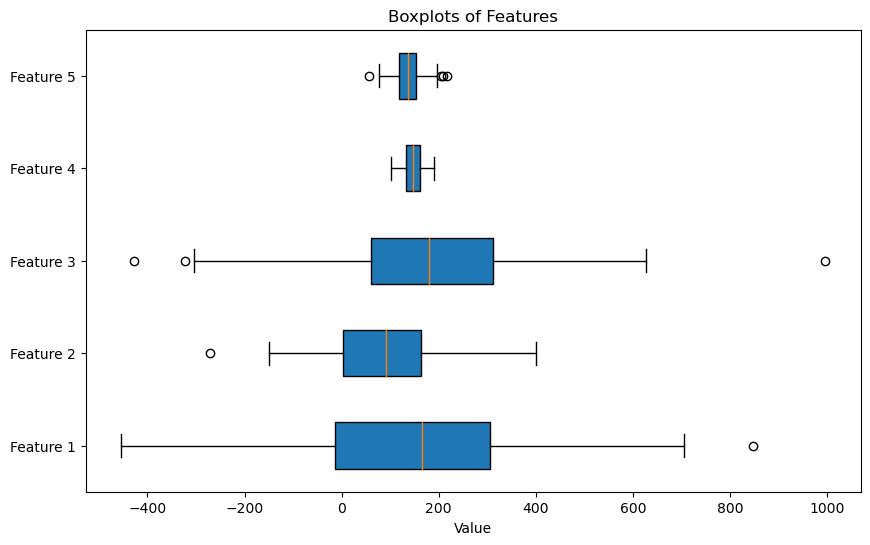

In [25]:
# First, visualize the outliers using a boxplot of the training set:


plt.figure(figsize=(10, 6))

# Plot a boxplot for each feature in X_train
plt.boxplot(X_train, vert=False, patch_artist=True, labels=[f'Feature {i+1}' for i in range(X_train.shape[1])])

# Add labels and title
plt.xlabel('Value')
plt.title('Boxplots of Features')

# Show the plot
plt.show()

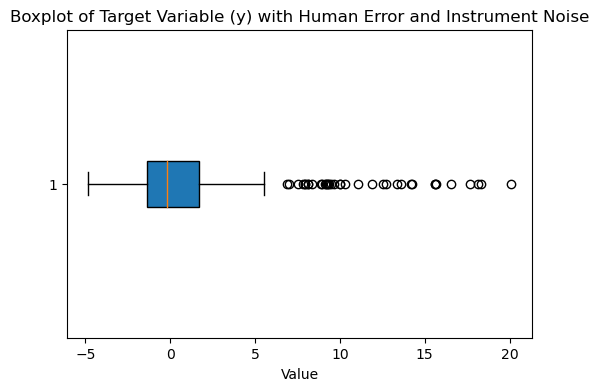

In [30]:
# Secondly, visualize outliers in target variable y, where instrument noise and human error has an influence.
plt.figure(figsize=(6, 4))

# Plot the boxplot for the target variable
plt.boxplot(y_train_with_human_error, vert=False, patch_artist=True)

# Add labels and title
plt.xlabel('Value')
plt.title('Boxplot of Target Variable (y) with Human Error and Instrument Noise')

# Show the plot
plt.show()

In [36]:
# Outliers in both X_train and y_train. To remove the outliers, it's important to remove outliers in both data sets. 

# Assuming X_train and y_train are NumPy arrays
# Calculate Z-scores for the features and target variable
z_scores_X = np.abs(stats.zscore(X_train))
z_scores_y = np.abs(stats.zscore(y_train))

# Set a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Create masks for non-outliers
non_outlier_mask_X = (z_scores_X < threshold).all(axis=1)  # All features within threshold
non_outlier_mask_y = (z_scores_y < threshold)              # Target variable within threshold

# Combine the masks to remove outliers from both X_train and y_train
combined_mask = non_outlier_mask_X & non_outlier_mask_y

# Filter the training set to remove outliers
X_train_filtered = X_train[combined_mask]
y_train_filtered = y_train[combined_mask]

# Create a linear regression model
model = LinearRegression()

# Fit the model to the filtered data (after removing outliers)
model.fit(X_train_filtered, y_train_filtered)

# Make predictions on the filtered training set
y_train_pred = model.predict(X_train_filtered)

# Calculate performance metrics for the new model
#mse = mean_squared_error(y_train_filtered, y_train_pred)
#r2 = r2_score(y_train_filtered, y_train_pred)


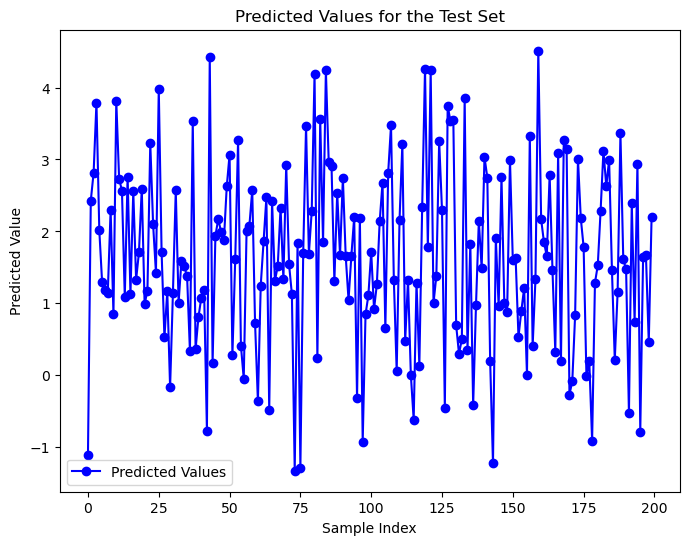

In [38]:
# Plot the predicted values for the test set
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_pred)), y_test_pred, 'bo-', label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values for the Test Set')
plt.legend()
plt.show()